In [65]:
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
import numpy as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [67]:
dataset=pd.read_csv(r"E:\Jupyter Programs\28-MobilePriceRange.csv")
dataset.head(3)

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BatteryPower    2000 non-null   int64  
 1   InternalMemory  2000 non-null   int64  
 2   ClockSpeed      2000 non-null   float64
 3   NoOfCores       2000 non-null   int64  
 4   RAM             2000 non-null   int64  
 5   TalkTime        2000 non-null   int64  
 6   DualSim         2000 non-null   int64  
 7   3G              2000 non-null   int64  
 8   4G              2000 non-null   int64  
 9   WiFi            2000 non-null   int64  
 10  Bluetooth       2000 non-null   int64  
 11  MobileDepth     2000 non-null   float64
 12  MobileWeight    2000 non-null   int64  
 13  TouchScreen     2000 non-null   int64  
 14  ScreenHeight    2000 non-null   int64  
 15  ScreenWidth     2000 non-null   int64  
 16  FrontCameraPx   2000 non-null   int64  
 17  RearCameraPX    2000 non-null   i

In [71]:
dataset["PriceRange"].value_counts()

PriceRange
Medium      500
High        500
VeryHigh    500
Low         500
Name: count, dtype: int64

In [73]:
x= dataset.iloc[:,:-1]
y=dataset["PriceRange"]

In [75]:
print(dataset.shape)

(2000, 21)


In [77]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [81]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 20) (1600, 20) (400, 20)


# KNN Algo

In [83]:

x_train_scaled=pd.DataFrame(scaler.transform(x_train),columns=x.columns)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_scaled,y_train)


train_pred = knc.predict(x_train_scaled)
train_accuracy=accuracy_score(train_pred,y_train)


test_pred = knc.predict(x_test_scaled)
test_accuracy=accuracy_score(test_pred,y_test)

print("Train Accuracy=> ",train_accuracy*100)
print("Test Accuract=> ",test_accuracy*100)

Train Accuracy=>  72.625
Test Accuract=>  47.75


# SVM Algo

In [98]:
model_classifier=svm.SVC(kernel='linear',gamma=1e-2,C=1DDDDDDDDDDDD0)
model_classifier.fit(x_train,y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [99]:
train_prediction=model_classifier.predict(x_train)
train_accuracy=accuracy_score(train_prediction,y_train)


test_prediction=model_classifier.predict(x_test)
test_accuracy=accuracy_score(test_prediction,y_test)


print("Train Accuracy=> ",train_accuracy*100)
print("Test Accuracy=> ",test_accuracy*100)

Train Accuracy=>  98.625
Test Accuracy=>  96.5


# Random Forest Algo

In [54]:
clf =RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
Ran_train_prediction = clf.predict(x_train)
Ran_train_accuracy = accuracy_score(Ran_train_prediction,y_train)


Ran_test_prediction = clf.predict(x_test)
Ran_test_accuracy = accuracy_score(Ran_test_prediction,y_test)

print("Train Accuracy=> ",Ran_train_accuracy*100)
print("Test Accuracy=> ",Ran_test_accuracy*100)

Train Accuracy=>  100.0
Test Accuracy=>  85.75


# Logistic Regression Algo

In [62]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000,random_state=42)
logistic_model.fit(x_train_scaled, y_train)

logistic_train_pred = logistic_model.predict(x_train_scaled)
logistic_train_accuracy= accuracy_score(logistic_train_pred,y_train)

logistic_test_pred = logistic_model.predict(x_test_scaled)
logistic_test_accuracy = accuracy_score(logistic_test_pred, y_test)


print("Train Accuracy => ",logistic_train_accuracy*100)
print("Test Accuracy => ", logistic_test_accuracy*100)

Train Accuracy =>  97.75
Test Accuracy =>  93.5


C:\Users\Moynuddin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


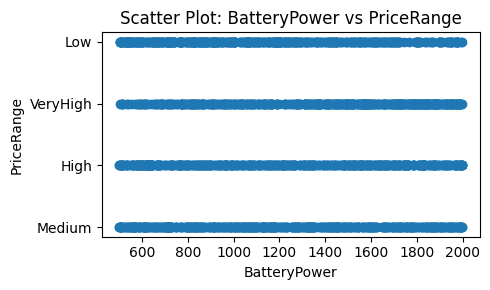

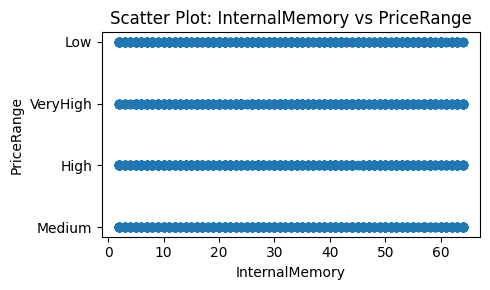

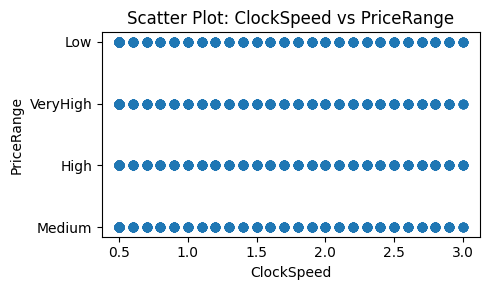

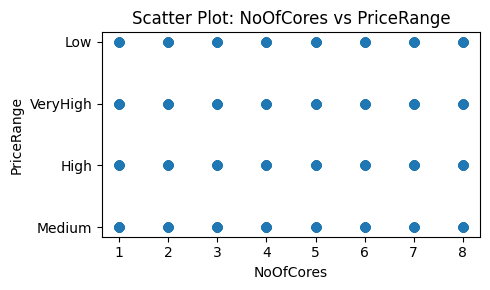

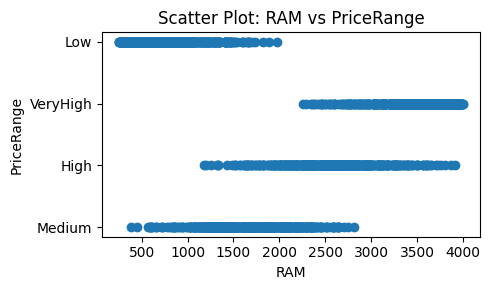

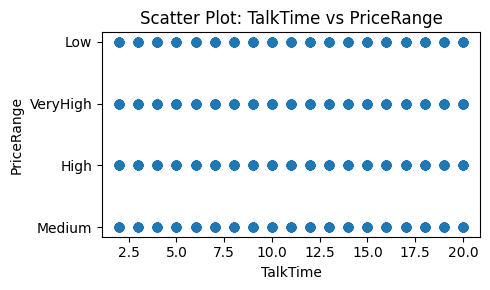

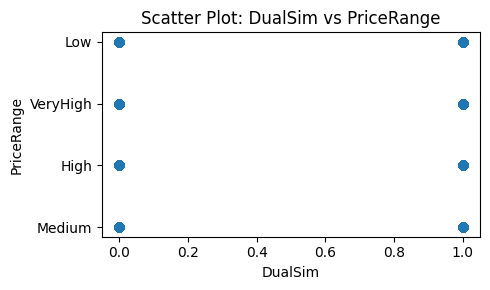

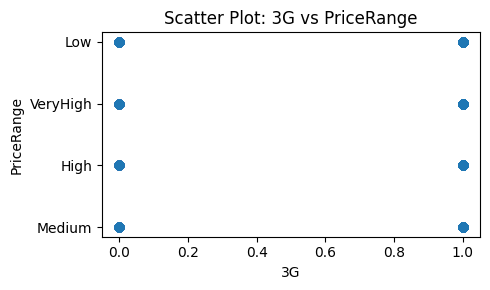

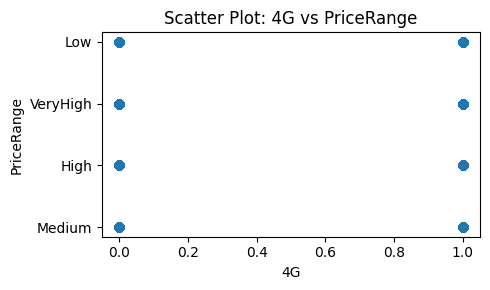

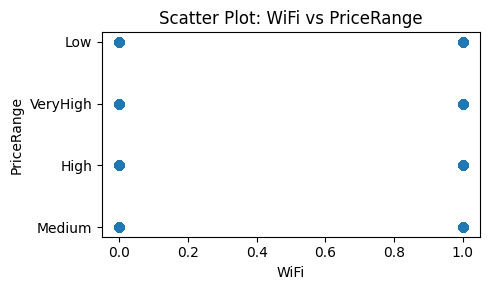

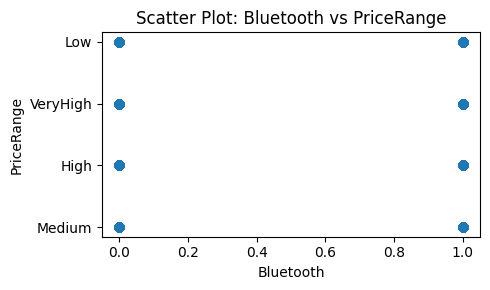

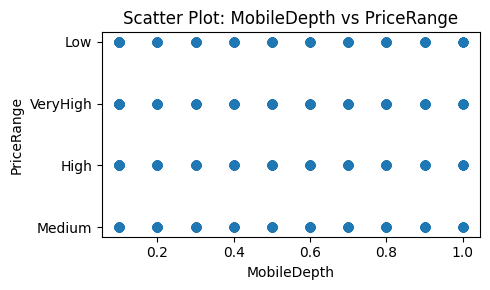

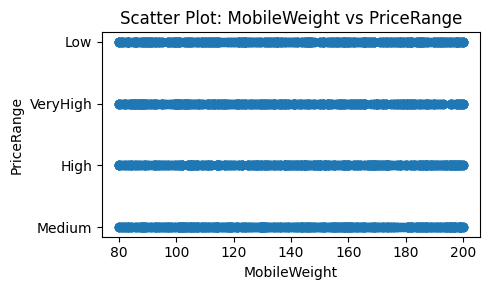

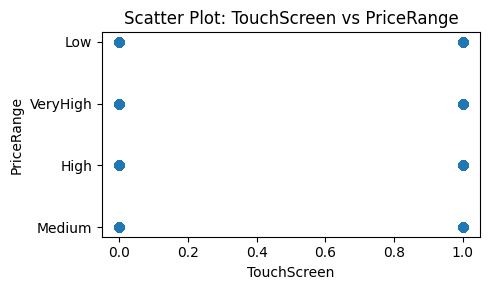

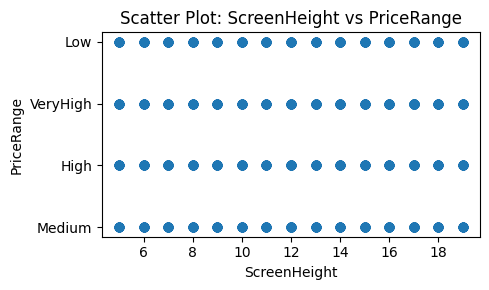

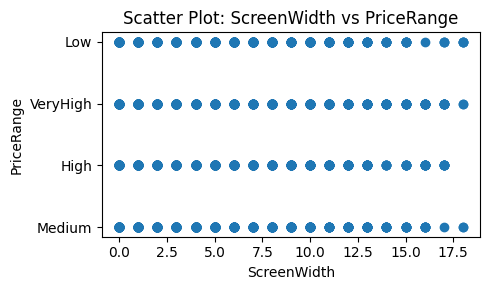

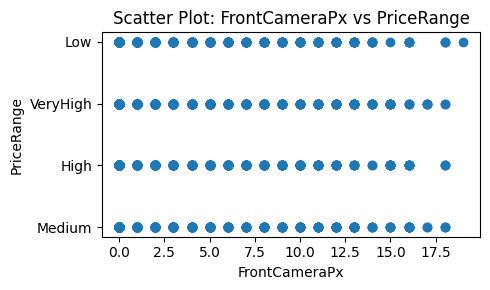

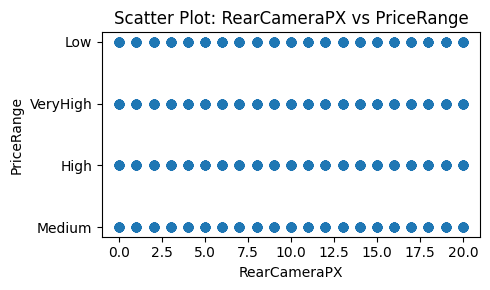

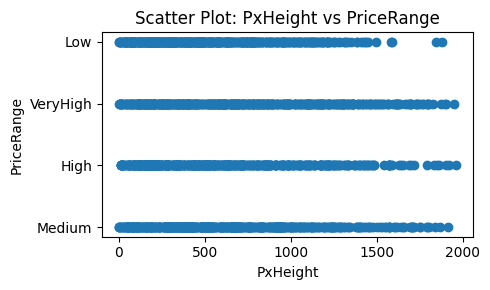

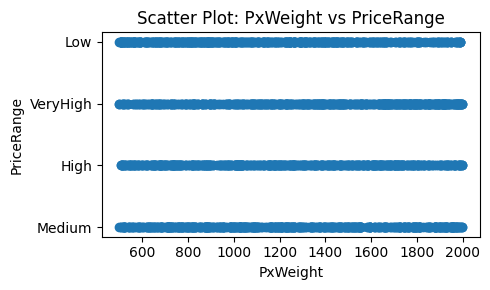

In [57]:
target_column = 'PriceRange'  # 🟡 Replace this with your actual target column name
                          # e.g., 'diabetes' or 'class' or whatever

# STEP 3: Loop through all features
for col in dataset.columns:
    if col != target_column:
        x = dataset[col].values
        y = dataset[target_column].values

        plt.figure(figsize=(5, 3))
        plt.scatter(x, y)
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.title(f'Scatter Plot: {col} vs {target_column}')
        plt.tight_layout()
        plt.show()